# Exploratory Data Analysis (EDA): NHIS 2022 Health Behaviors and Outcomes

This notebook provides an initial exploration of the National Health Interview Survey (NHIS) 2022 data, focusing on demographics, health behaviors, and the prevalence of major diseases. The goal is to understand the data structure, identify key predictors, and inform subsequent modeling.

---

## 1. Data Overview


In [34]:
import pandas as pd
import numpy as np

# Load cleaned data
df = pd.read_csv('../data/nhis_2022_cleaned.csv')
print("Rows:", df.shape[0], "Columns:", df.shape[1])
df.head()


Rows: 35115 Columns: 49


,YEAR,SERIAL,STRATA,PSU,NHISHID,REGION,PERNUM,NHISPID,HHX,SAMPWEIGHT,...,SODAPNO,FRIESPNO,SPORDRMNO,FRTDRINKMNO,COFETEAMNO,POTATONO,PIZZANO,HRSLEEP,CVDSHT,weight
0,2022,1,143,16,0002022H000001,4,1,0002022H00000110,H000001,8018.0,...,0,110,3,0,0,3,2,8.0,1,8018.0
1,2022,2,106,53,0002022H000003,3,1,0002022H00000310,H000003,10117.0,...,0,1,0,0,1,1,1,6.0,2,10117.0
2,2022,2,106,53,0002022H000003,3,2,0002022H00000320,H000003,7933.0,...,996,996,996,996,996,996,996,NaN,2,7933.0
3,2022,3,134,13,0002022H000006,2,1,0002022H00000610,H000006,2681.0,...,1,1,0,2,0,1,1,6.0,2,2681.0
4,2022,4,106,53,0002022H000007,3,1,0002022H00000710,H000007,10233.0,...,30,5,1,0,30,6,2,8.0,2,10233.0


### Variable Information

Key variables of interest:
- **Demographics:** AGE, SEX, MARSTCUR, EDUC
- **Health Metrics:** BMICALC (BMI), HRSLEEP (sleep hours), VIG10DMIN (vigorous activity), CIGDAYMO (smoking), FRUTNO (fruit intake)
- **Disease Outcomes:** CANCEREV, CHEARTDIEV, DIABETICEV, HEARTATTEV, STROKEV, ANY_DISEASE


In [35]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
YEAR               0
SERIAL             0
STRATA             0
PSU                0
NHISHID            0
REGION             0
PERNUM             0
NHISPID            0
HHX                0
SAMPWEIGHT         0
ASTATFLG           0
CSTATFLG           0
AGE               64
SEX                6
MARSTCUR        8682
EDUC            7613
HOURSWRK           0
POVERTY            0
HEIGHT             0
WEIGHT             0
BMICALC         6833
HINOTCOVE          0
CANCEREV        7501
CHEARTDIEV      7544
DIABETICEV        38
HEARTATTEV      7507
STROKEV         7504
ALCANYNO           0
ALCDAYSYR          0
CIGDAYMO       34421
MOD10DMIN          0
VIG10DMIN      25651
FRUTNO          8554
VEGENO             0
JUICEMNO           0
SALADSNO           0
BEANNO             0
SALSAMNO           0
TOMSAUCEMNO        0
SODAPNO            0
FRIESPNO           0
SPORDRMNO          0
FRTDRINKMNO        0
COFETEAMNO         0
POTATONO           0
PIZZANO            0
HRSLEEP

---

## 2. Demographics

Let's explore the distribution of age, sex, marital status, and education.


In [36]:
print("Age summary:")
print(df['AGE'].describe())

print("\nSex distribution:")
print(df['SEX'].value_counts(dropna=False))

print("\nMarital status:")
print(df['MARSTCUR'].value_counts(dropna=False))

print("\nEducation (EDUC):")
print(df['EDUC'].value_counts(dropna=False).sort_index())


Age summary:
count    35051.000000
mean        43.559984
std         24.483455
min          0.000000
25%         23.000000
50%         45.000000
75%         65.000000
max         85.000000
Name: AGE, dtype: float64

Sex distribution:
SEX
2.0    18653
1.0    16456
NaN        6
Name: count, dtype: int64

Marital status:
MARSTCUR
1.0    11610
NaN     8682
8.0     5692
5.0     3640
6.0     2679
7.0     1765
2.0      662
4.0      379
3.0        6
Name: count, dtype: int64

Education (EDUC):
EDUC
103.0    1881
116.0     488
201.0    6351
202.0     632
301.0    4112
302.0    1065
303.0    2561
400.0    6307
501.0    3025
505.0    1080
NaN      7613
Name: count, dtype: int64


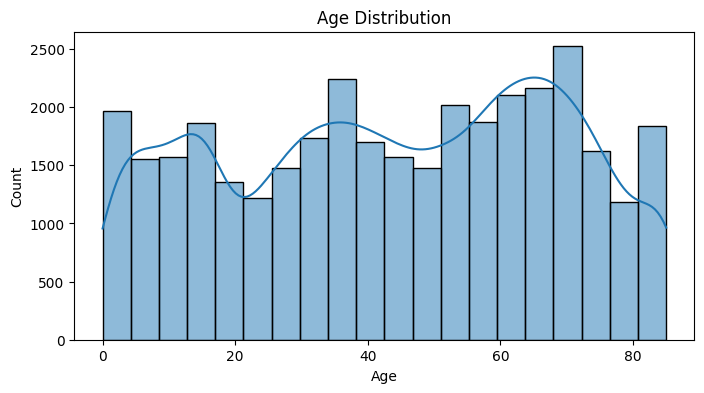

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.savefig("../results/eda_age_distribution.png")
plt.show()


---

## 3. Health Behaviors and Metrics

Explore BMI, sleep, activity, smoking, and fruit intake.


In [38]:
metrics = ['BMICALC', 'HRSLEEP', 'VIG10DMIN', 'CIGDAYMO', 'FRUTNO']
df[metrics].describe()


,BMICALC,HRSLEEP,VIG10DMIN,CIGDAYMO,FRUTNO
count,28282.000000,26679.000000,9464.000000,694.000000,26561.000000
mean,27.275228,7.134188,56.795224,12.968300,3.723429
std,5.759636,1.404180,54.866918,9.669077,5.821466
min,11.500000,1.000000,1.000000,0.000000,0.000000
25%,23.200000,6.000000,30.000000,4.000000,1.000000
50%,26.600000,7.000000,45.000000,12.000000,2.000000
75%,30.800000,8.000000,60.000000,20.000000,4.000000
max,52.700000,24.000000,720.000000,30.000000,120.000000


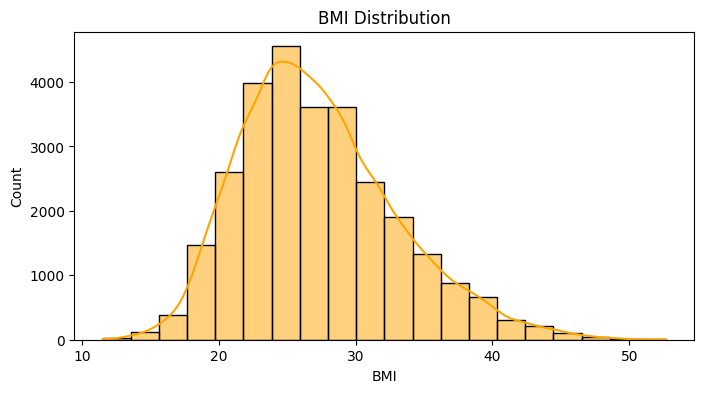

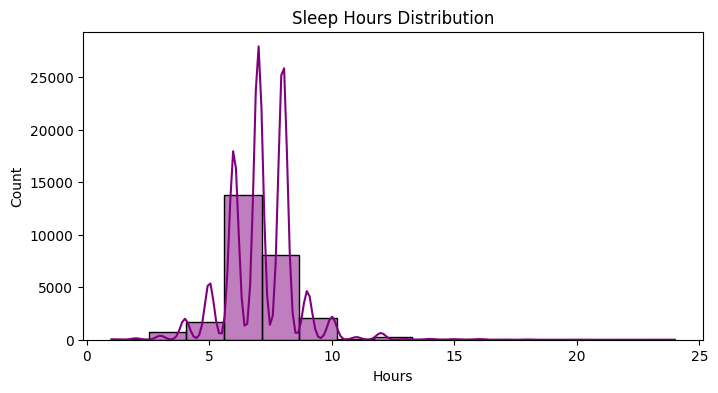

In [39]:
plt.figure(figsize=(8,4))
sns.histplot(df['BMICALC'], bins=20, kde=True, color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.savefig("../results/eda_bmi_distribution.png")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['HRSLEEP'], bins=15, kde=True, color='purple')
plt.title('Sleep Hours Distribution')
plt.xlabel('Hours')
plt.savefig("../results/eda_sleep_distribution.png")
plt.show()


---

## 4. Disease Outcomes

Examine the prevalence of each major disease and the composite "any disease" variable.


In [40]:
disease_vars = ['CANCEREV', 'CHEARTDIEV', 'DIABETICEV', 'HEARTATTEV', 'STROKEV']
for var in disease_vars:
    print(f"{var}:")
    print(df[var].value_counts(normalize=True, dropna=False))
    print()

if 'ANY_DISEASE' in df.columns:
    print("Any Disease Prevalence:")
    print(df['ANY_DISEASE'].value_counts(normalize=True, dropna=False))


CANCEREV:
CANCEREV
1.0    0.688709
NaN    0.213612
2.0    0.097679
Name: proportion, dtype: float64

CHEARTDIEV:
CHEARTDIEV
1.0    0.736010
NaN    0.214837
2.0    0.049153
Name: proportion, dtype: float64

DIABETICEV:
DIABETICEV
1.0    0.914196
2.0    0.084722
NaN    0.001082
Name: proportion, dtype: float64

HEARTATTEV:
HEARTATTEV
1.0    0.757255
NaN    0.213783
2.0    0.028962
Name: proportion, dtype: float64

STROKEV:
STROKEV
1.0    0.757596
NaN    0.213698
2.0    0.028706
Name: proportion, dtype: float64



---

## 5. Bivariate Analysis

How do age and BMI relate to diabetes status?


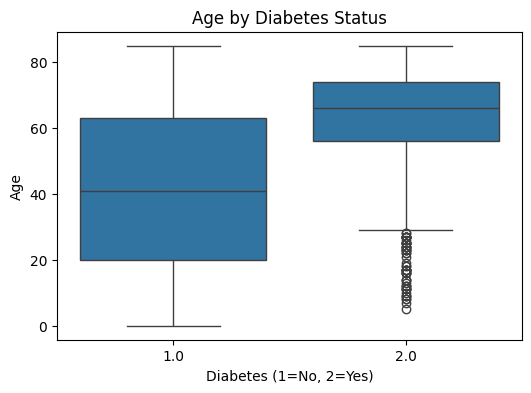

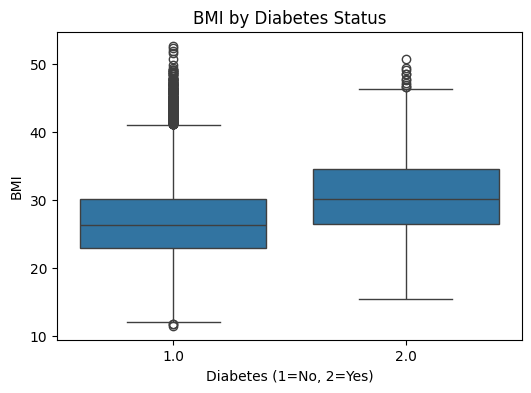

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x='DIABETICEV', y='AGE', data=df)
plt.title('Age by Diabetes Status')
plt.xlabel('Diabetes (1=No, 2=Yes)')
plt.ylabel('Age')
plt.savefig("../results/eda_age_by_diabetes.png")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='DIABETICEV', y='BMICALC', data=df)
plt.title('BMI by Diabetes Status')
plt.xlabel('Diabetes (1=No, 2=Yes)')
plt.ylabel('BMI')
plt.savefig("../results/eda_bmi_by_diabetes.png")
plt.show()


---

## 6. Correlation Matrix

Check relationships between continuous predictors.


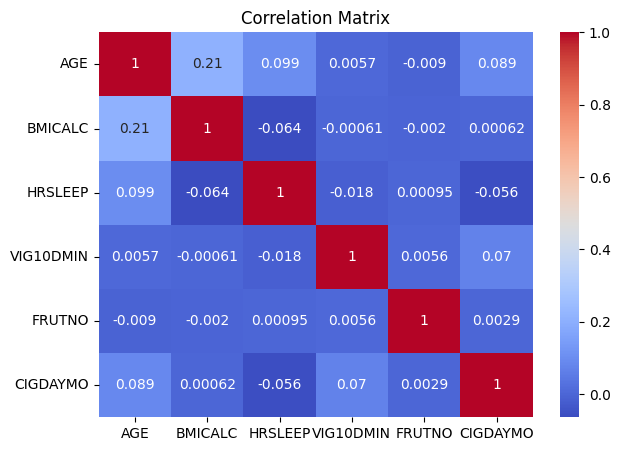

In [42]:
cont_vars = ['AGE', 'BMICALC', 'HRSLEEP', 'VIG10DMIN', 'FRUTNO', 'CIGDAYMO']
corr = df[cont_vars].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig("../results/eda_correlation_matrix.png")
plt.show()


---

## 7. Outlier Detection

Visualize outliers in key health metrics.


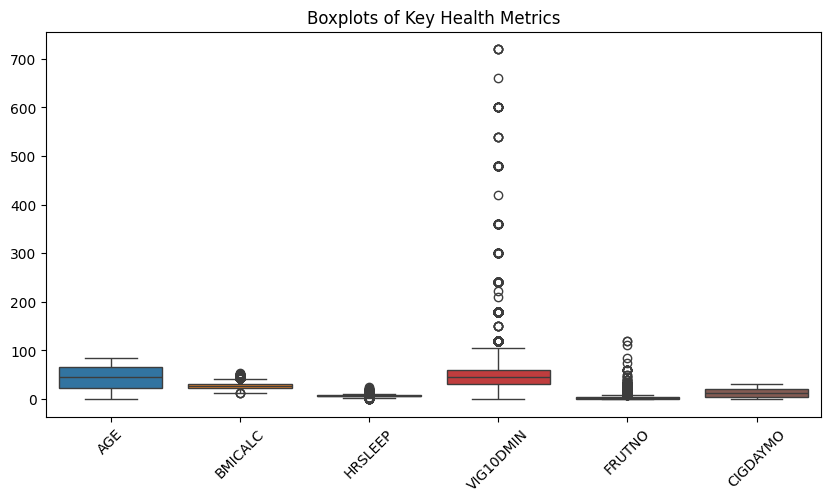

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[cont_vars])
plt.title('Boxplots of Key Health Metrics')
plt.xticks(rotation=45)
plt.savefig("../results/eda_boxplot.png")
plt.show()
